# EMA Experimentation Multiprocessing

First version of how experiments can be performed using Multiprocessing in EMA for the migration model. 

The model also requires the model and the data files to be in the same folder as this notebook.

# 1. Importing the required Python packages

In [1]:
from ema_workbench import(Model, RealParameter,Constant,IntegerParameter,CategoricalParameter) 
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench.em_framework.evaluators import LHS, SOBOL
import timeit
from ema_workbench import MultiprocessingEvaluator
from ema_workbench.analysis.plotting import envelopes
#from ema_workbench.analysis.plotting_util import KDE
import pandas as pd
import numpy as np

C:\Users\anton\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\anton\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:27: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\anton\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\anton\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
C:\Users\anton\Anaconda3\lib\importlib\_bootstrap.py:219: Impor

In [2]:
#Sub-library of matplotlib. We use the '%' sign to define the graphs we
#want to call as we perform experiments.
%matplotlib inline
#Provides a MATLAB-like plotting framework for data analytics and image
#processing to produce figures in the notebook.
import matplotlib.pyplot as plt
#Not necessary for analysis (as we use it), but it allows us to change
#colours in graphs.
import seaborn as sns
#Used to create and manage N-dimensional array objects and random number
#capabilities.
import numpy as np
#Used for data structures and data analysis to manage Microsoft Excel-like
#structures.
import pandas as pd
#Running System Dynamics models in python.
import pysd
#Use operating system dependent functionality to manipulate paths - to
#save/load files. This is important when copying this code or replicating
#the experiments so we don't have to develop new paths.
import os
#Used for designing experiments and the performing of experiments.
import ema_workbench
from ema_workbench import (Model,
 IntegerParameter,
RealParameter,
ScalarOutcome,
Constant,
perform_experiments,
save_results,
load_results,
TimeSeriesOutcome,
Policy
 )
from ema_workbench.em_framework import samplers, util
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench.connectors.pysd_connector import PysdModel
from ema_workbench.analysis.plotting import (lines, kde_over_time)
 
from ema_workbench.analysis.pairs_plotting import (pairs_lines,pairs_scatter,pairs_density)


# 2.Specify uncertainties and outcomes

In [3]:
from __future__ import (division, unicode_literals, absolute_import,
                        print_function)



#Import and turn on logging to view EMA process run. This is so that we
#get updates during experiments.
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

from ema_workbench.connectors.vensim import VensimModel


if __name__ == "__main__":
     #turn on logging
    ema_logging.log_to_stderr(ema_logging.INFO)

    # instantiate a model
    wd = r'C:\Users\anton\Downloads\Final Model'
    vensimModel = VensimModel("WholeModelFinal",wd=wd,
                              model_file=r'WholeModelFinal.vpm')
    

    vensimModel.uncertainties = [
                                 
                                     RealParameter("depreciation rate",0.075,0.125),
                                     RealParameter("annual growth rate inflation", 0,0.03),
                                     RealParameter("labor force participation rate", 0.6,0.8),
                                     RealParameter("average hiring time for new workforce", 0.5,1),
                                     RealParameter("average firing time workforce", 1,1.5),
                                     RealParameter("propensity to save",0.05,0.1),
                                     RealParameter("growth rate EU", 0.01,0.03),
                                     RealParameter("GDP deflator EU", 1,1.2),
                                     RealParameter("import elasticity", 1,2),
                                     RealParameter("export elasticity", 1,1.2),
                                     RealParameter("interest rate as percentage of GDP", 0.01,0.05),
                                     RealParameter("Average fertility per woman", 1.2,2.1),
                                     RealParameter("percentage public employees", 0.1,0.2),
                                     RealParameter("productivity growth factor", -0.01,0.03),
                                     RealParameter("investments as percentage of profit", 0.2,0.5),
                                     
                                  ]
    

    vensimModel.outcomes = [TimeSeriesOutcome('real GDP'),
                            TimeSeriesOutcome('profit'),
                            TimeSeriesOutcome('Gross capital formation companies'),
                            TimeSeriesOutcome('gross capital formation government'),
                            TimeSeriesOutcome('real disposable income'),
                            TimeSeriesOutcome('Public Budget Balance including interest payments'),
                            TimeSeriesOutcome('unemployment rate')
                            
                           ]
    

 #   vensimModel.levers = [RealParameter("corporate profit tax rate", 0.2, 0.4),
  #                        RealParameter("tax rate on personal income", 0.2, 0.4),
   #                       RealParameter("value added tax rate", 0.15, 0.25),
    #                      RealParameter("public investments as a ratio of public budget balance", 0.4, 0.8)]



    
    
    
    

# 3. Specify the policies and run the experiments

In [4]:
# import timeit

# start_time = timeit.default_timer()

# N_SCENARIOS = 100

# results = perform_experiments(vensimModel, N_SCENARIOS, policies=10)

# elapsed = timeit.default_timer() - start_time

# print("Total time in minutes:", round(elapsed/60))

In [5]:
import timeit

policies=[Policy('Lower taxes',**{"corporate profit tax rate": 0.25,
                                     "tax rate on personal income":0.2,
                                      "value added tax rate":0.2,
                                      "public investments as a ratio of public budget balance":0.4}),

          Policy('Higher taxes',**{"corporate profit tax rate": 0.35,
                                     "tax rate on personal income":.4,
                                     "value added tax rate":.25,
                                     "public investments as a ratio of public budget balance":0.8})]

start_time = timeit.default_timer()

N_SCENARIOS = 5000

results = perform_experiments(vensimModel, N_SCENARIOS, policies=policies)

elapsed = timeit.default_timer() - start_time

print("Total time in minutes:", round(elapsed/60))

[MainProcess/INFO] performing 5000 scenarios * 2 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished


Total time in minutes: 50


In [4]:
#pd1=pd.DataFrame(outcomes['unemployment rate'][:,-1])

In [5]:
#experiments

In [6]:
#experiments, outcomes = results

In [7]:
#outcomes['TIME']

In [10]:
#np.shape(outcomes['TIME'])

In [6]:
from ema_workbench import save_results, load_results
save_results(results, r'./results.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\anton\Downloads\Final Model\results.tar.gz


In [7]:
file_name = "results.tar.gz"
experiments, outcomes = load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\anton\Downloads\Final Model\results.tar.gz


In [8]:
print(list(outcomes.keys()))

['TIME', 'real GDP', 'profit', 'Gross capital formation companies', 'gross capital formation government', 'real disposable income', 'Public Budget Balance including interest payments', 'unemployment rate']


Taking Time variable out of the outcomes

In [9]:
if 'TIME' in outcomes: 
     del outcomes['TIME']

In [10]:
results=experiments
print(type(experiments))
print(type(outcomes))
print(type(results))

<class 'pandas.core.frame.DataFrame'>
<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


# 4.Visualization of the results

In [11]:
#outcomes.keys()

In [12]:
#pd.DataFrame(outcomes["real GDP"]).shape

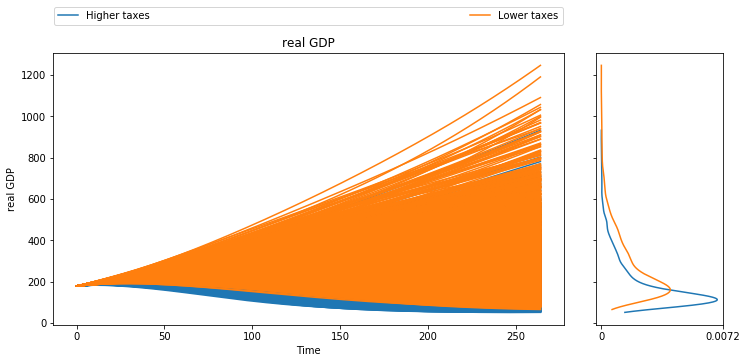

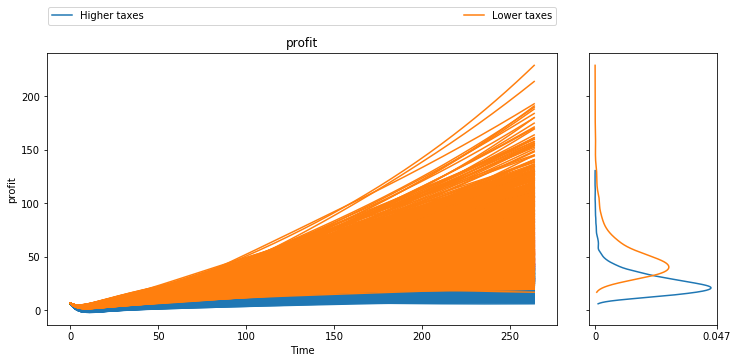

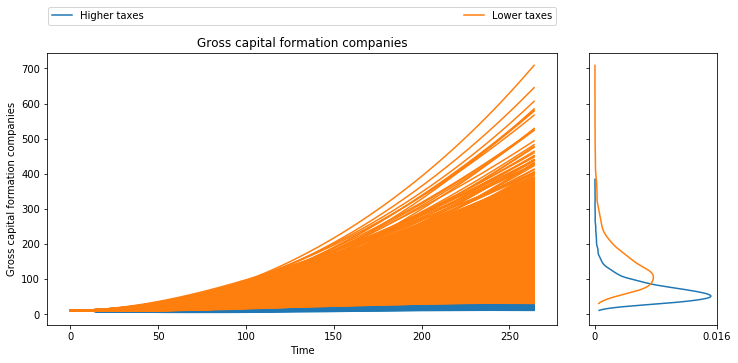

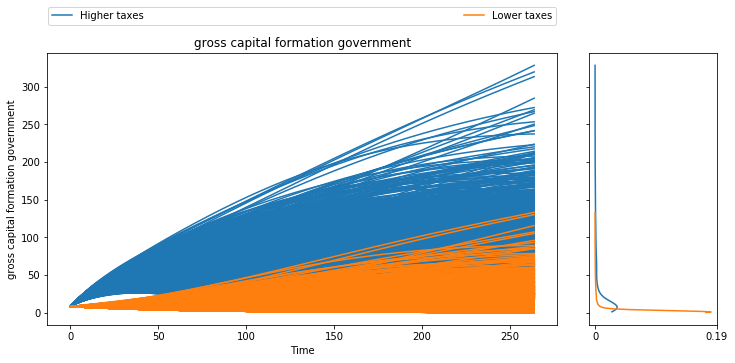

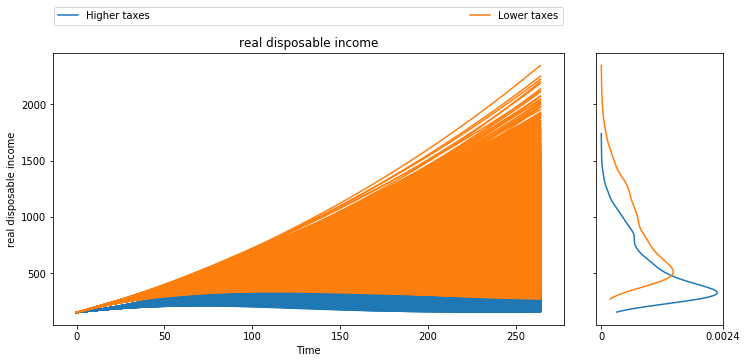

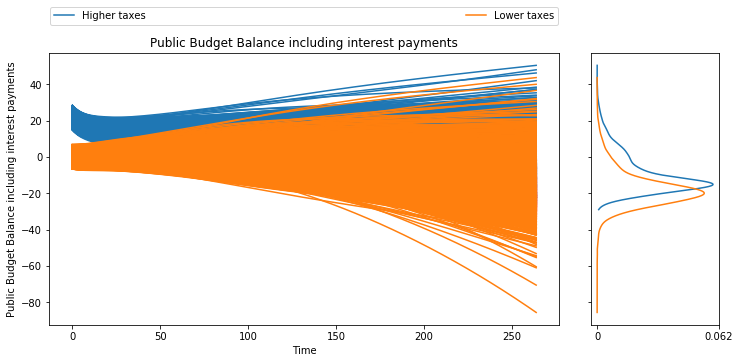

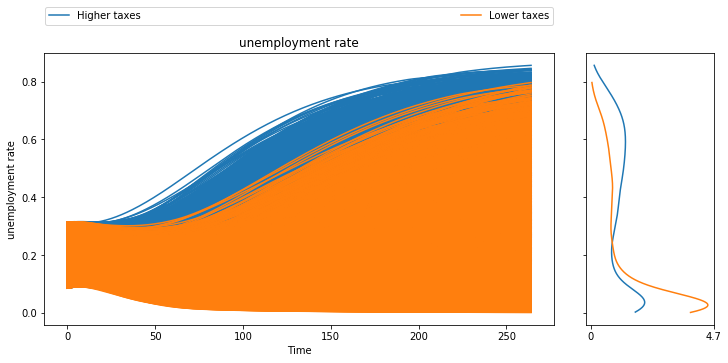

In [13]:
from ema_workbench.analysis import plotting
from ema_workbench.analysis import plotting_util
for outcome in outcomes.keys():
    fig,axes= plotting.lines(experiments,outcomes,outcomes_to_show=outcome,density=plotting_util.Density.KDE,group_by='policy')
    fig.set_size_inches(12,5)
plt.show()

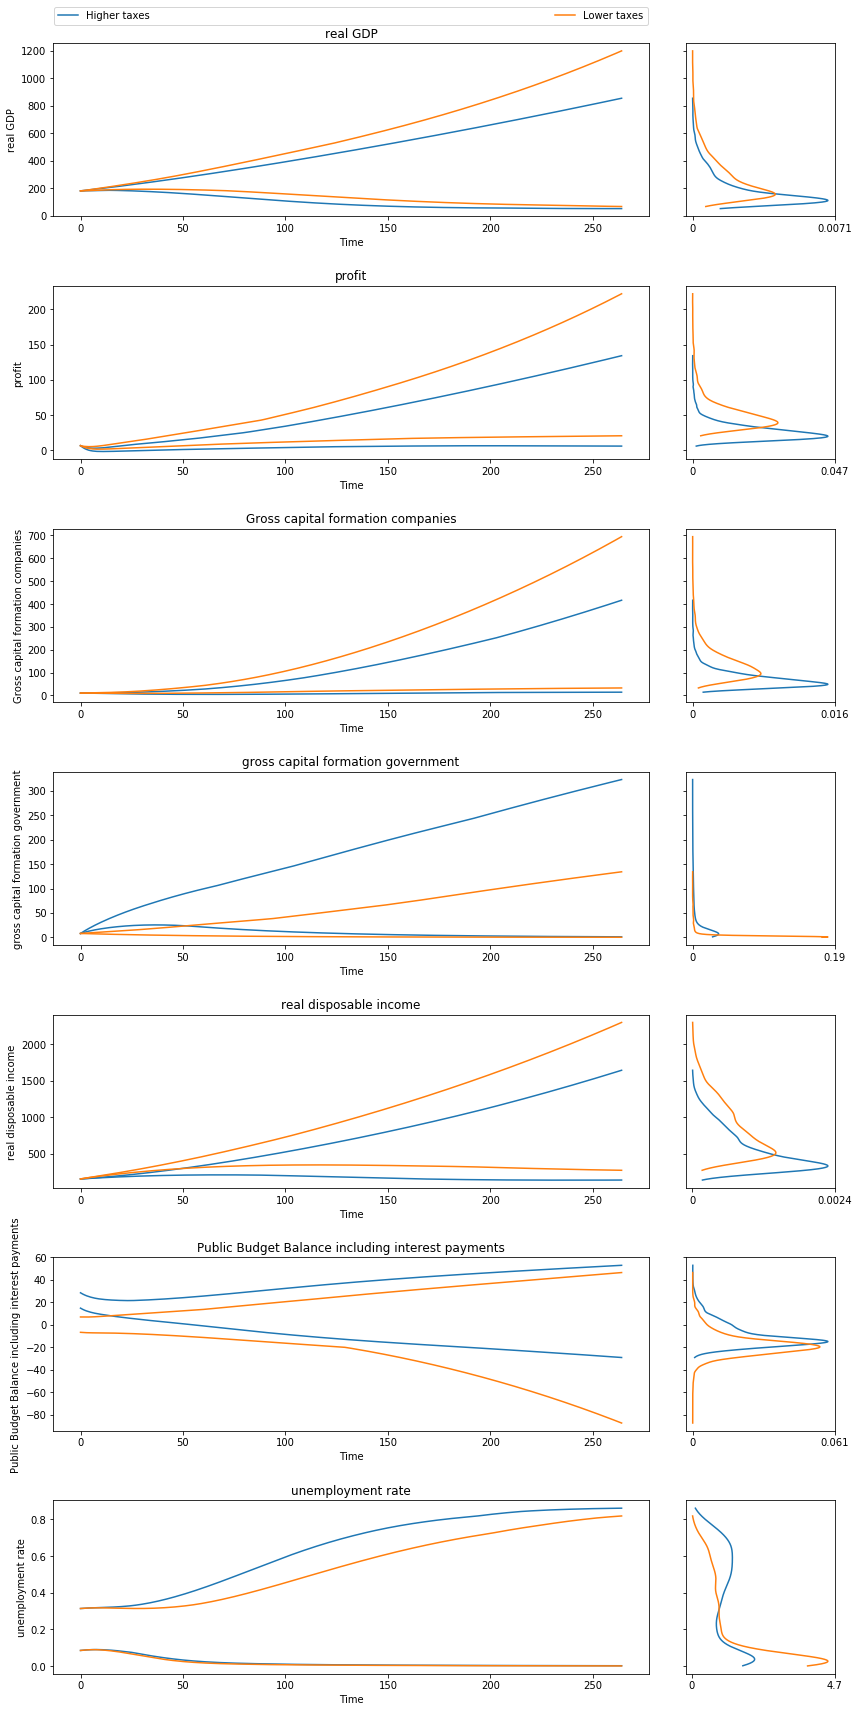

In [15]:
from ema_workbench.analysis import plotting
fig, axes = plotting.envelopes(results,outcomes,density=plotting_util.Density.KDE, group_by='policy')
fig.set_figheight(30)
fig.set_figwidth(14)
plt.show()

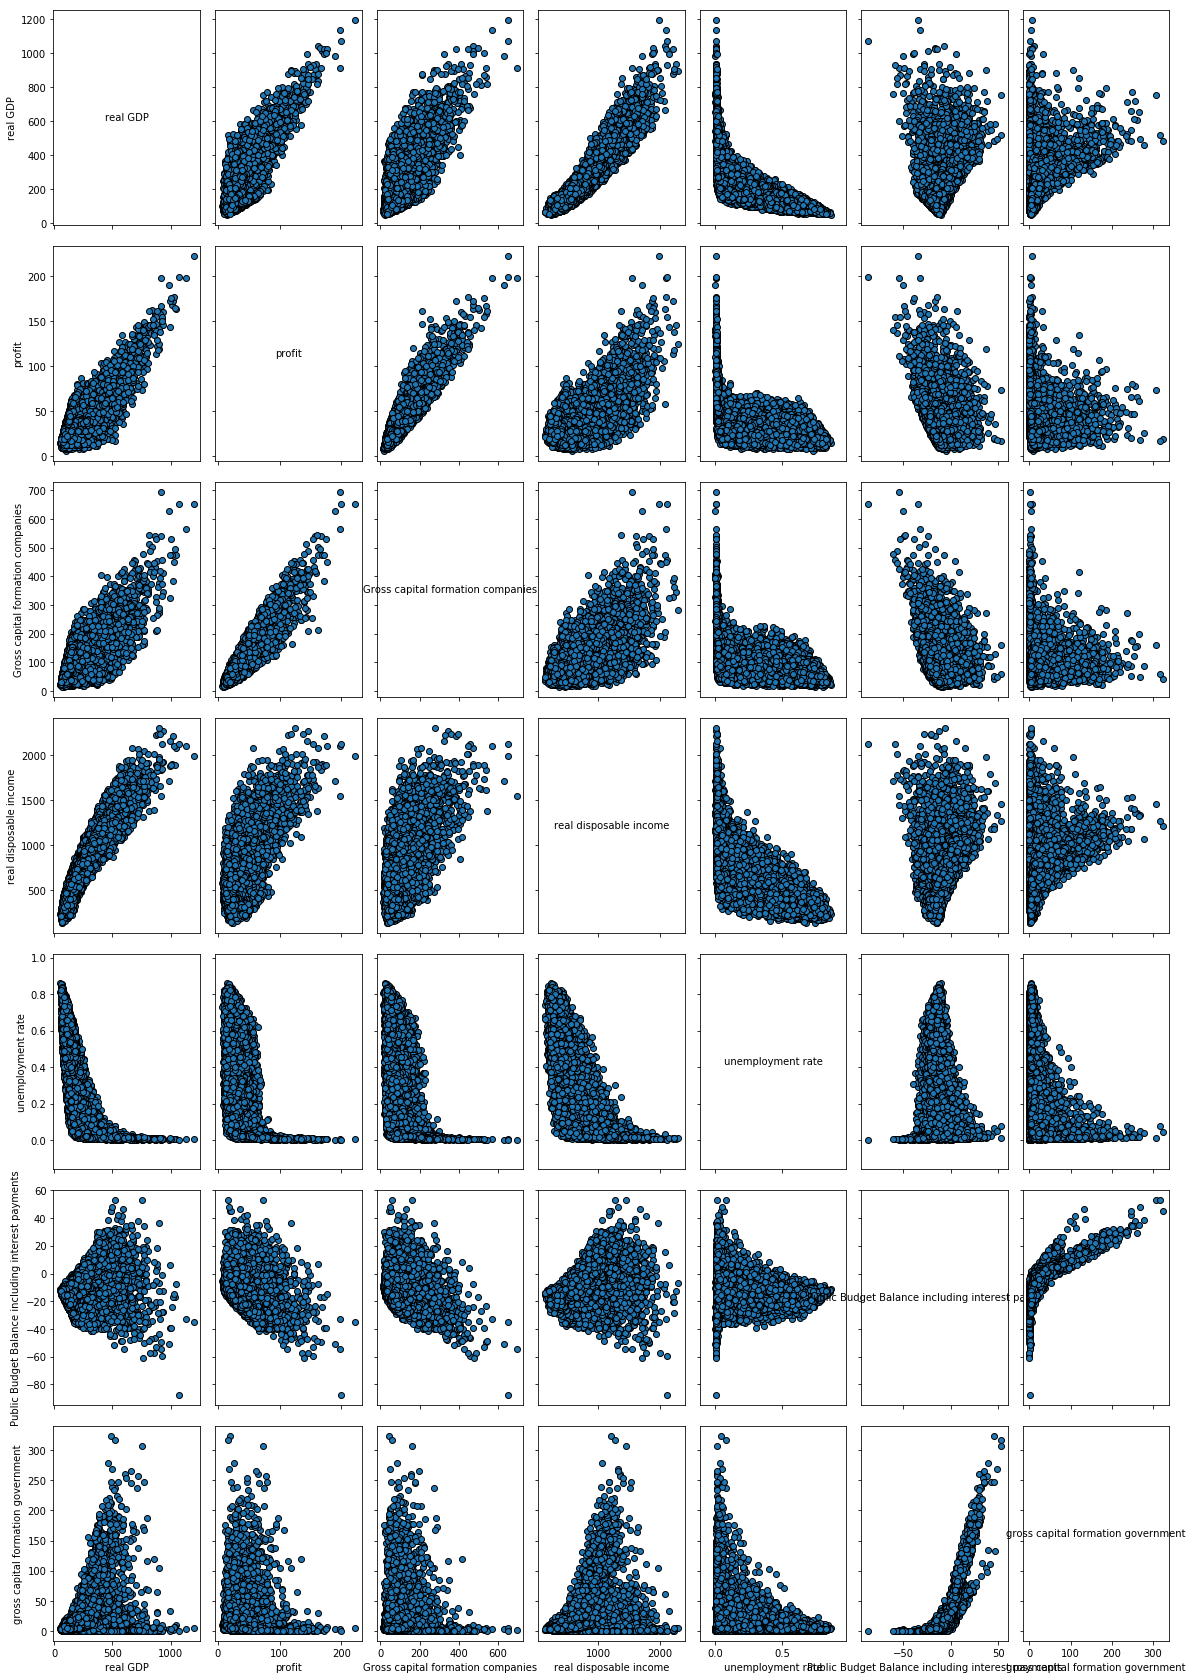

In [16]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=['real GDP',
                                                             'profit',
                                                             'Gross capital formation companies',
                                                             'real disposable income',
                                                             'unemployment rate',
                                                             'Public Budget Balance including interest payments',
                                                             'gross capital formation government'
                                                            ],group_by=None)
fig.set_figheight(30)
fig.set_figwidth(20)
plt.show()

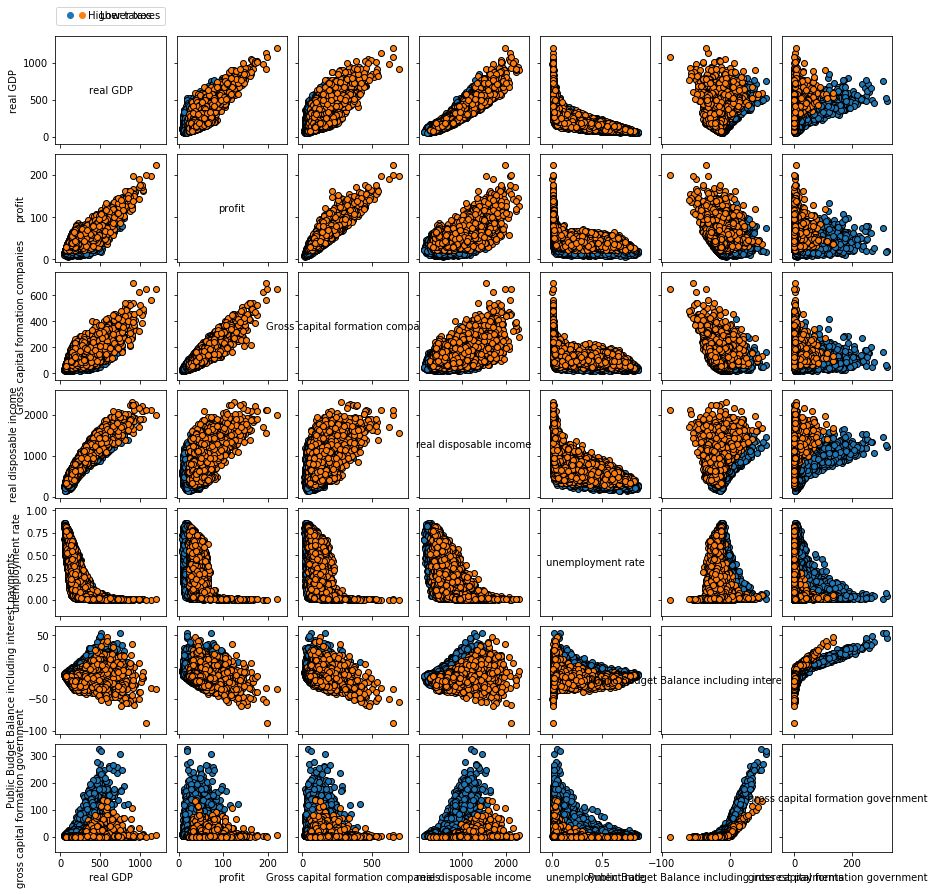

In [17]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=['real GDP',
                                                             'profit',
                                                             'Gross capital formation companies',
                                                             'real disposable income',
                                                             'unemployment rate',
                                                             'Public Budget Balance including interest payments',
                                                             'gross capital formation government'
                                                             ],group_by='policy')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

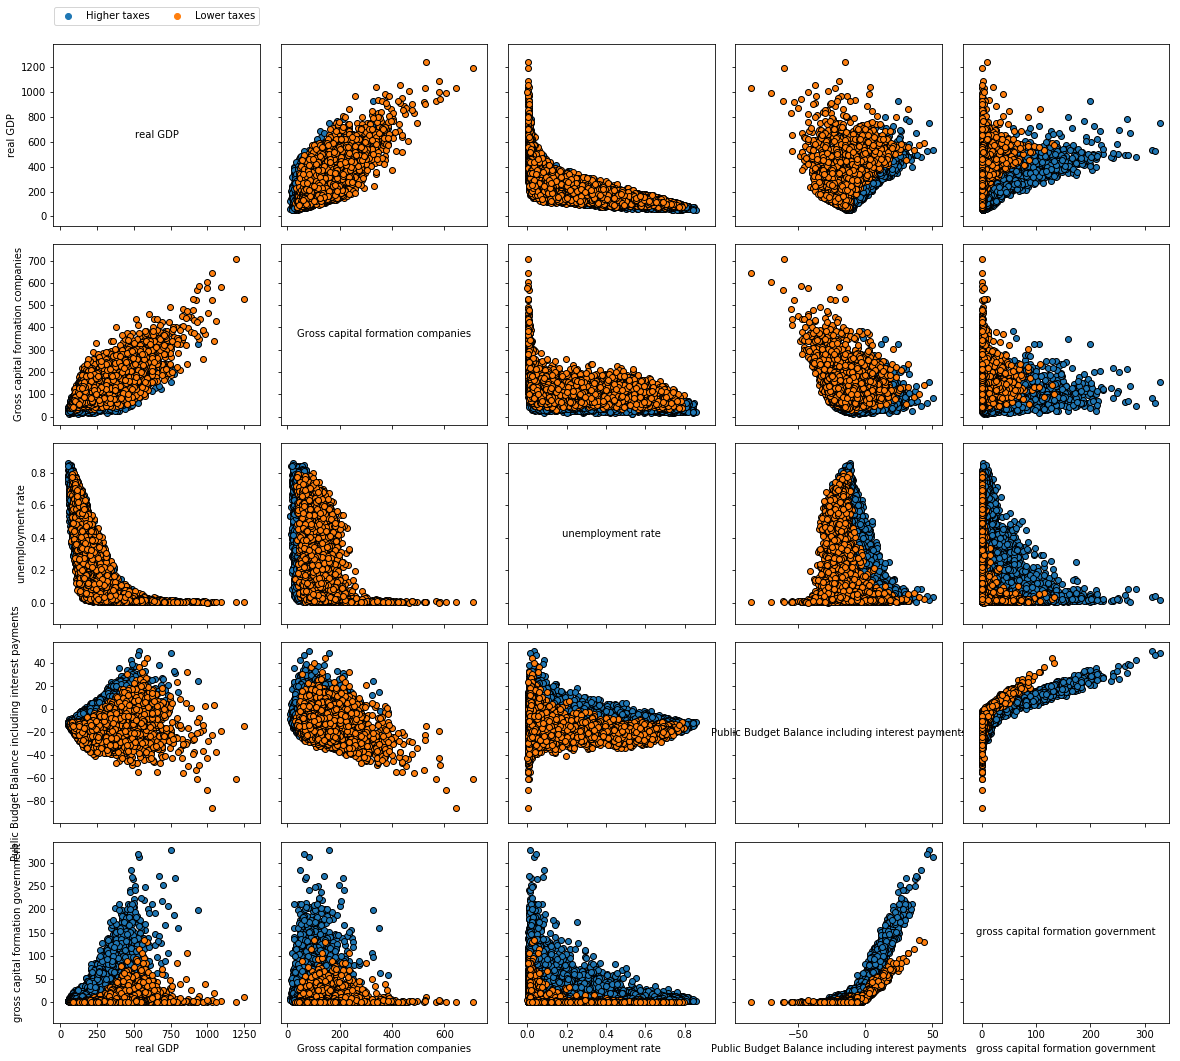

In [14]:
fig, axes = pairs_scatter(results,outcomes,outcomes_to_show=['real GDP',
                                                            # 'profit',
                                                             'Gross capital formation companies',
                                                            # 'real disposable income',
                                                             'unemployment rate',
                                                             'Public Budget Balance including interest payments',
                                                             'gross capital formation government' 
                                                             ],group_by='policy')
fig.set_figheight(18)
fig.set_figwidth(20)
plt.show()

# 5. Reflection of  results

From the analysis conducted above it can be clearly seen that a **reduction of taxes**

i)leads higher values of:
       
       a) real GDP
       b) company profits
       c) private investments
       d) real disposable income
       e) unemployment rate
      
 
ii)leads to lower values for:

       a) Public budget balance including interest payments
       b) gross capital formation government



       

# 6. Sensitivity Analysis

In [19]:
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol

from ema_workbench.analysis import feature_scoring
#from ema_workbench.analysis.scenario_discovery_util import REGRESSION

In [20]:
sobol_problem = problem = get_SALib_problem(vensimModel.uncertainties)

In [21]:
#experiments["policy"] = experiments["policy"].apply(lambda x: 0 if x == "Lower taxes" else 1)

In [22]:
experiments.head()

,Average fertility per woman,GDP deflator EU,annual growth rate inflation,average firing time workforce,average hiring time for new workforce,depreciation rate,export elasticity,growth rate EU,import elasticity,interest rate as percentage of GDP,...,percentage public employees,productivity growth factor,propensity to save,scenario,policy,model,corporate profit tax rate,tax rate on personal income,value added tax rate,public investments as a ratio of public budget balance
0,1.757895,1.064783,0.007498,1.305756,0.707206,0.124075,1.160629,0.018030,1.635884,0.022878,...,0.123627,-0.006406,0.081275,0,Lower taxes,WholeModelFinal,0.25,0.2,0.2,0.4
1,2.026261,1.117357,0.006885,1.463184,0.608709,0.109029,1.016872,0.012018,1.950724,0.034584,...,0.189646,0.005103,0.075686,1,Lower taxes,WholeModelFinal,0.25,0.2,0.2,0.4
2,2.045814,1.188786,0.021832,1.483550,0.829854,0.078371,1.043710,0.020530,1.257453,0.027548,...,0.178823,-0.008547,0.082242,2,Lower taxes,WholeModelFinal,0.25,0.2,0.2,0.4
3,1.711525,1.146040,0.008979,1.470413,0.651756,0.108058,1.078068,0.012944,1.316386,0.024523,...,0.146374,0.008456,0.086578,3,Lower taxes,WholeModelFinal,0.25,0.2,0.2,0.4
4,1.407716,1.185781,0.001935,1.373352,0.882734,0.122565,1.079525,0.016078,1.782062,0.011465,...,0.114447,0.027923,0.094997,4,Lower taxes,WholeModelFinal,0.25,0.2,0.2,0.4


In [ ]:
n_scenarios = 500


experiments1, outcomes1 = perform_experiments(vensimModel,n_scenarios,uncertainty_sampling=SOBOL,policies=policies)

start_time = timeit.default_timer()



elapsed = timeit.default_timer() - start_time

print("Total time in minutes:", elapsed/60)
  

In [ ]:
def plot_scores(scores):
    scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,8)
    fig.subplots_adjust(bottom=0.3)
    return fig

In [ ]:
y1 = np.mean(outcomes['unemployment rate'],axis=1)
len(y1)
scores1 = sobol.analyze(problem, y1, calc_second_order=True, print_to_console=False)

In [ ]:
y2 = np.mean(outcomes['real GDP'],axis=1)
scores2 = sobol.analyze(problem, y2, calc_second_order=True, print_to_console=False)

In [ ]:
y3 = np.mean(outcomes['Gross capital formation companies'],axis=1)
scores3 = sobol.analyze(problem, y3, calc_second_order=True, print_to_console=False)

In [ ]:
y4 = np.mean(outcomes['gross capital formation government'],axis=1)
scores4 = sobol.analyze(problem, y4, calc_second_order=True, print_to_console=False)

In [ ]:
y5 = np.mean(outcomes['real disposable income'],axis=1)
scores5 = sobol.analyze(problem, y5, calc_second_order=True, print_to_console=False)

In [ ]:
y6 = np.mean(outcomes['Public Budget Balance including interest payments'],axis=1)
scores6 = sobol.analyze(problem, y6, calc_second_order=True, print_to_console=False)

In [ ]:
y7 = np.mean(outcomes['profit'],axis=1)
scores7 = sobol.analyze(problem, y7, calc_second_order=True, print_to_console=False)

In [ ]:
#unemployment rate
plot_scores(scores1)
plt.show()

In [ ]:
#real GDP
plot_scores(scores2)
plt.show()

In [ ]:
#Gross capital formation companies
plot_scores(scores3)
plt.show()

In [ ]:
#gross capital formation government
plot_scores(scores4)
plt.show()

In [ ]:
#real disposable income
plot_scores(scores5)
plt.show()

In [ ]:
#Public Budget Balance including interest payments
plot_scores(scores6)
plt.show()

In [ ]:
#profit
plot_scores(scores7)
plt.show()

In [ ]:
sobol_scores1 = pd.DataFrame(list(zip(sobol_problem['names'], scores1['ST'])))

In [ ]:
DFSobol1 = pd.DataFrame(sobol_scores1)
DFSobol1

In [ ]:
sobol_scores2 = pd.DataFrame(list(zip(sobol_problem['names'], scores2['ST'])))
DFSobol2 = pd.DataFrame(sobol_scores2)
DFSobol2

In [ ]:
sobol_scores3 = pd.DataFrame(list(zip(sobol_problem['names'], scores3['ST'])))
DFSobol3 = pd.DataFrame(sobol_scores3)
DFSobol3

In [ ]:
sobol_scores4 = pd.DataFrame(list(zip(sobol_problem['names'], scores4['ST'])))
DFSobol4 = pd.DataFrame(sobol_scores4)
DFSobol4

In [ ]:
sobol_scores5 = pd.DataFrame(list(zip(sobol_problem['names'], scores5['ST'])))
DFSobol5 = pd.DataFrame(sobol_scores5)
DFSobol5

In [ ]:
sobol_scores6 = pd.DataFrame(list(zip(sobol_problem['names'], scores6['ST'])))
DFSobol6 = pd.DataFrame(sobol_scores6)
DFSobol6

In [ ]:
sobol_scores7 = pd.DataFrame(list(zip(sobol_problem['names'], scores7['ST'])))
DFSobol7 = pd.DataFrame(sobol_scores7)
DFSobol7

In [257]:
n_scenarios = 500


experiments, outcomes = perform_experiments(vensimModel,n_scenarios,policies=policies,uncertainty_sampling=SOBOL)

start_time = timeit.default_timer()



elapsed = timeit.default_timer() - start_time

print("Total time in minutes:", elapsed/60)
  

[MainProcess/INFO] performing 16000 scenarios * 2 policies * 1 model(s) = 32000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 6400 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 12800 cases completed
[MainProcess/INFO] 16000 cases completed
[MainProcess/INFO] 19200 cases completed
[MainProcess/INFO] 22400 cases completed
[MainProcess/INFO] 25600 cases completed
[MainProcess/INFO] 28800 cases completed
[MainProcess/INFO] 32000 cases completed
[MainProcess/INFO] experiments finished


Total time in minutes: 8.636666704357291e-06


# 7. Scenario discovery-Prim

In [3]:
from ema_workbench.analysis import prim
from ema_workbench.analysis import prim, dimensional_stacking, feature_scoring
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [4]:
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot

In [5]:
#loading the results from the visualization
file_name = "results.tar.gz"
experiments1, outcomes1 = load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\anton\Downloads\Final Model\results.tar.gz


In [6]:
len(experiments1)

10000

In [7]:
#transforming the names of the policies in integers
experiments1["policy"] = experiments1["policy"].apply(lambda x: 0 if x == "Lower taxes" else 1)

In [8]:
#outcomes1

In [9]:
experiments1

,Average fertility per woman,GDP deflator EU,annual growth rate inflation,average firing time workforce,average hiring time for new workforce,depreciation rate,export elasticity,growth rate EU,import elasticity,interest rate as percentage of GDP,...,percentage public employees,productivity growth factor,propensity to save,scenario,policy,model,corporate profit tax rate,tax rate on personal income,value added tax rate,public investments as a ratio of public budget balance
0,1.645115,1.080525,0.027781,1.249265,0.572007,0.094178,1.105416,0.025963,1.175926,0.018842,...,0.188581,-0.006424,0.074145,0,0,WholeModelFinal,0.25,0.2,0.20,0.4
1,2.029004,1.171499,0.004528,1.473071,0.816728,0.112144,1.062248,0.013612,1.920761,0.048041,...,0.124133,-0.008650,0.099140,1,0,WholeModelFinal,0.25,0.2,0.20,0.4
2,1.343716,1.008206,0.001473,1.185200,0.854495,0.104132,1.052983,0.021337,1.844845,0.046927,...,0.111746,0.027027,0.060244,2,0,WholeModelFinal,0.25,0.2,0.20,0.4
3,1.355009,1.094084,0.002629,1.493780,0.748142,0.085194,1.165764,0.013181,1.490762,0.038309,...,0.140207,-0.001706,0.077675,3,0,WholeModelFinal,0.25,0.2,0.20,0.4
4,2.011882,1.124679,0.027183,1.363391,0.686189,0.118658,1.151920,0.015938,1.870888,0.046279,...,0.106260,-0.006523,0.088147,4,0,WholeModelFinal,0.25,0.2,0.20,0.4
5,1.380171,1.133874,0.004881,1.093903,0.765054,0.085492,1.128519,0.027072,1.698625,0.037646,...,0.131018,0.006045,0.051464,5,0,WholeModelFinal,0.25,0.2,0.20,0.4
6,1.848719,1.170170,0.023005,1.054104,0.604952,0.110351,1.167812,0.022611,1.209501,0.035365,...,0.184847,0.012820,0.081740,6,0,WholeModelFinal,0.25,0.2,0.20,0.4
7,1.673514,1.099854,0.027666,1.241887,0.596246,0.116290,1.045650,0.029461,1.205388,0.047026,...,0.101706,-0.003139,0.078123,7,0,WholeModelFinal,0.25,0.2,0.20,0.4
8,1.556389,1.041950,0.008027,1.493111,0.777332,0.076575,1.154866,0.019760,1.247448,0.012286,...,0.133684,-0.008107,0.067071,8,0,WholeModelFinal,0.25,0.2,0.20,0.4
9,1.720297,1.043944,0.027220,1.378915,0.787562,0.078293,1.080695,0.010690,1.801937,0.041128,...,0.141863,0.012500,0.072421,9,0,WholeModelFinal,0.25,0.2,0.20,0.4


In [10]:
pd_new=pd.DataFrame(outcomes1['unemployment rate'][:,-1])

In [11]:
#pd4=pd.concat([pd_new,experiments['policy'], axis = 1)

In [12]:
#pd4=pd4.rename(columns = {'0':'unemployment rate'}, inplace = True)

In [13]:
#pd4.head()

In [14]:
#pd4[pd4['policy'] == 1]['0'].describe()

In [15]:
pd.DataFrame(outcomes1['unemployment rate'][:,-1]).describe([0.25, .5, .75])

,0
count,10000.000000
mean,0.280002
std,0.247363
min,0.001801
25%,0.035831
50%,0.224609
75%,0.496423
max,0.856453


In [16]:
pd.DataFrame(outcomes1['real GDP'][:,-1]).describe([0.25, .5, .75])

,0
count,10000.000000
mean,226.353891
std,142.370773
min,50.892685
25%,123.425957
50%,178.794110
75%,293.782860
max,1247.182500


In [17]:
pd.DataFrame(outcomes1['Gross capital formation companies'][:,-1]).describe([0.25, .5, .75])

,0
count,10000.000000
mean,103.279103
std,65.244057
min,10.861539
25%,58.415973
50%,86.573140
75%,129.594173
max,708.666500


In [18]:
pd.DataFrame(outcomes1['gross capital formation government'][:,-1]).describe([0.25, .5, .75])

,0
count,10000.000000
mean,14.618186
std,30.602090
min,0.127720
25%,0.580504
50%,3.703763
75%,11.270578
max,328.582030


In [19]:
pd.DataFrame(outcomes1['real disposable income'][:,-1]).describe([0.25, .5, .75])

,0
count,10000.000000
mean,683.767252
std,351.020888
min,154.005420
25%,411.001197
50%,596.962190
75%,895.260775
max,2346.868700


In [20]:
pd.DataFrame(outcomes1['Public Budget Balance including interest payments'][:,-1]).describe([0.25, .5, .75])

,0
count,10000.000000
mean,-13.358101
std,11.332414
min,-85.484940
25%,-20.438755
50%,-15.467565
75%,-8.335162
max,50.402634


In [21]:
pd.DataFrame(outcomes1['profit'][:,-1]).describe([0.25, .5, .75])

,0
count,10000.000000
mean,38.668160
std,21.432518
min,6.270453
25%,23.695828
50%,34.563097
75%,47.422467
max,228.714660


In [22]:
#exp=pd.DataFrame(experiments)
#out=pd.DataFrame.from_dict(outcomes['real GDP'])

In [23]:
experiments2=experiments1.drop(columns=['policy','model','corporate profit tax rate','tax rate on personal income','value added tax rate','public investments as a ratio of public budget balance'])

In [24]:
experiments2.head()

,Average fertility per woman,GDP deflator EU,annual growth rate inflation,average firing time workforce,average hiring time for new workforce,depreciation rate,export elasticity,growth rate EU,import elasticity,interest rate as percentage of GDP,investments as percentage of profit,labor force participation rate,percentage public employees,productivity growth factor,propensity to save,scenario
0,1.645115,1.080525,0.027781,1.249265,0.572007,0.094178,1.105416,0.025963,1.175926,0.018842,0.408537,0.765160,0.188581,-0.006424,0.074145,0
1,2.029004,1.171499,0.004528,1.473071,0.816728,0.112144,1.062248,0.013612,1.920761,0.048041,0.410971,0.604771,0.124133,-0.008650,0.099140,1
2,1.343716,1.008206,0.001473,1.185200,0.854495,0.104132,1.052983,0.021337,1.844845,0.046927,0.332013,0.679554,0.111746,0.027027,0.060244,2
3,1.355009,1.094084,0.002629,1.493780,0.748142,0.085194,1.165764,0.013181,1.490762,0.038309,0.333354,0.631722,0.140207,-0.001706,0.077675,3
4,2.011882,1.124679,0.027183,1.363391,0.686189,0.118658,1.151920,0.015938,1.870888,0.046279,0.350139,0.765584,0.106260,-0.006523,0.088147,4


In [25]:
y_un= np.mean(outcomes1['unemployment rate'],axis=1)
pdy1=pd.DataFrame(y_un).describe([0.25,0.75])
pdy1

,0
count,10000.000000
mean,0.202196
std,0.142377
min,0.021185
25%,0.077335
50%,0.159924
75%,0.310832
max,0.631188


In [26]:
#unemployment, high 25%
y1_outcome = y_un > 0.310832

In [43]:
prim_alg = prim.Prim(experiments2, y1_outcome, threshold=0.9, peel_alpha=0.1)
box1= prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 2500 cases of interest
[MainProcess/INFO] mean: 0.9593023255813954, mass: 0.0516, coverage: 0.198, density: 0.9593023255813954 restricted_dimensions: 4


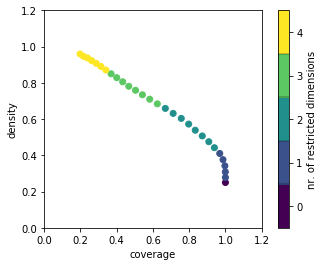

In [48]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.show()

coverage      0.7116
density     0.631299
id                12
mass          0.2818
mean        0.631299
res_dim            2
Name: 12, dtype: object

                                box 12            \
                                   min       max   
annual growth rate inflation  0.017206  0.029995   
productivity growth factor    0.003878  0.029998   

                                                               
                                                    qp values  
annual growth rate inflation  [1.2111625638332914e-240, -1.0]  
productivity growth factor      [7.522695388454813e-45, -1.0]  



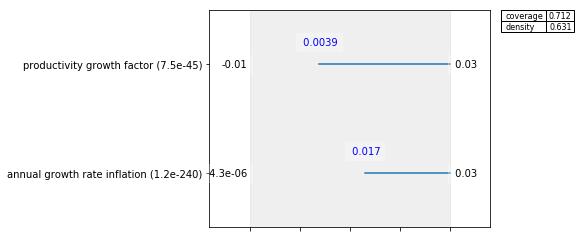

In [49]:
n_box = 12
box1.inspect(n_box)
box1.inspect(n_box, style='graph')
plt.show()

In [50]:
# box1.select(10)
# fig = box1.show_pairs_scatter()
# #fig.set_size_inches(12,12)
# plt.show()

In [51]:
y_real= np.mean(outcomes1['real GDP'],axis=1)
pdy2=pd.DataFrame(y_real).describe([0.25,0.9])
pdy2

,0
count,10000.000000
mean,224.363051
std,75.173506
min,100.536266
25%,166.465501
50%,208.054804
90%,330.804080
max,633.800744


In [52]:
#real GDP,low 25%
y2_outcome= y_real<166.465501

In [53]:
y_high=y_real> 330.804080

In [54]:
prim_alg = prim.Prim(experiments2, y_high, threshold=0.7, peel_alpha=0.1)
box8= prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 1000 cases of interest
[MainProcess/INFO] mean: 0.7383720930232558, mass: 0.0516, coverage: 0.381, density: 0.7383720930232558 restricted_dimensions: 3


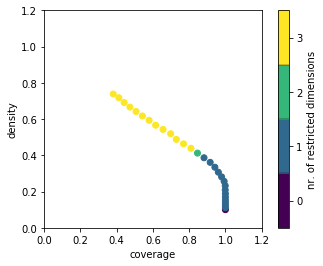

In [55]:
import matplotlib.pyplot as plt
 
box8.show_tradeoff()
plt.show()

coverage       0.846
density     0.412281
id                15
mass          0.2052
mean        0.412281
res_dim            2
Name: 15, dtype: object

                                box 15            \
                                   min       max   
annual growth rate inflation  0.000004  0.006844   
import elasticity             1.000105  1.908717   

                                                               
                                                    qp values  
annual growth rate inflation  [-1.0, 1.5681148262498227e-281]  
import elasticity                [-1.0, 0.008944758808559331]  



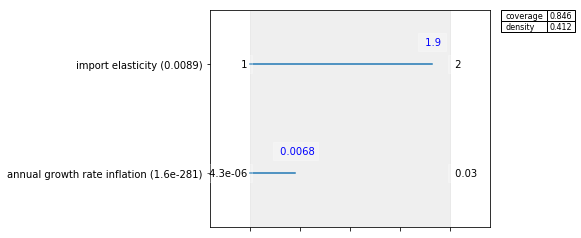

In [56]:
n_box = 15
box8.inspect(n_box)
box8.inspect(n_box, style='graph')
plt.show()

In [57]:
#plt.hist(y2, bins=30)

In [98]:
prim_alg = prim.Prim(experiments2, y2_outcome, threshold=0.8, peel_alpha=0.1)
box2= prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 2500 cases of interest
[MainProcess/INFO] mean: 0.874031007751938, mass: 0.0516, coverage: 0.1804, density: 0.874031007751938 restricted_dimensions: 4


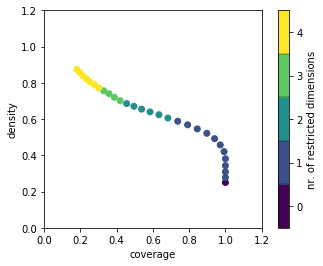

In [99]:
import matplotlib.pyplot as plt
 
box2.show_tradeoff()
plt.show()

coverage      0.6828
density     0.605749
id                12
mass          0.2818
mean        0.605749
res_dim            2
Name: 12, dtype: object

                                box 12                                        
                                   min       max                     qp values
annual growth rate inflation  0.020604  0.029995                   [0.0, -1.0]
propensity to save            0.054702  0.099998  [0.029714557935031673, -1.0]



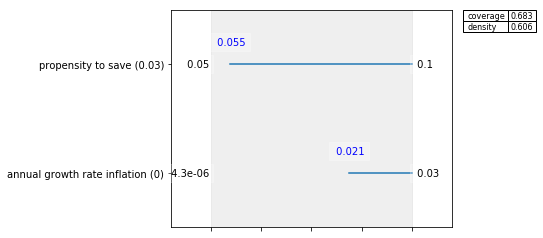

In [100]:
n_box = 12
box2.inspect(n_box)
box2.inspect(n_box, style='graph')
plt.show()

In [101]:
y_comp= np.mean(outcomes1['Gross capital formation companies'],axis=1)
pdy3=pd.DataFrame(y_comp).describe([0.25])
pdy3

,0
count,10000.000000
mean,48.833754
std,25.221934
min,8.821328
25%,30.364558
50%,43.009259
max,231.362215


In [102]:
#Gross capital formation companies,low 25%  
y3_outcome=y_comp <40.364558

[MainProcess/INFO] 10000 points remaining, containing 4533 cases of interest
[MainProcess/INFO] mean: 0.9599236641221374, mass: 0.0524, coverage: 0.11096404147363777, density: 0.9599236641221374 restricted_dimensions: 6


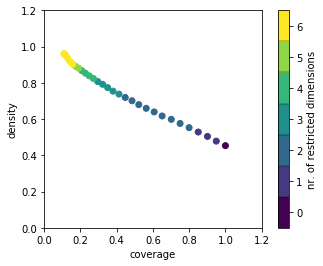

In [103]:
prim_alg = prim.Prim(experiments2, y3_outcome, threshold=0.9, peel_alpha=0.1)
box3= prim_alg.find_box()
box3.show_tradeoff()
plt.show()

coverage    0.650783
density     0.617155
id                 7
mass           0.478
mean        0.617155
res_dim            2
Name: 7, dtype: object

                                        box 7            \
                                          min       max   
investments as percentage of profit  0.200019  0.376920   
annual growth rate inflation         0.005566  0.029995   

                                                                     
                                                          qp values  
investments as percentage of profit   [-1.0, 2.821187529326035e-66]  
annual growth rate inflation         [2.0371296545709437e-11, -1.0]  



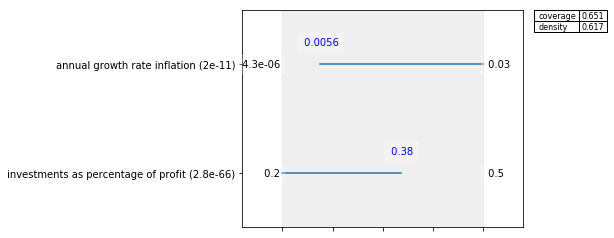

In [150]:
n_box = 7
box3.inspect(n_box)
box3.inspect(n_box, style='graph')
plt.show()

In [105]:
y_gov= np.mean(outcomes1['gross capital formation government'],axis=1)
pdy4=pd.DataFrame(y_gov).describe([0.25])
pdy4

,0
count,10000.000000
mean,24.589814
std,25.904288
min,1.892366
25%,3.296107
50%,17.920707
max,180.149399


In [106]:
#gross capital formation government,low 25%
y4_outcome=y_gov < 30

[MainProcess/INFO] 10000 points remaining, containing 6791 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0878, coverage: 0.12928876454130467, density: 1.0 restricted_dimensions: 5


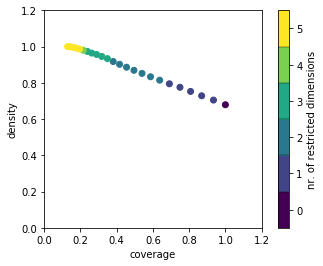

In [107]:
prim_alg = prim.Prim(experiments2, y4_outcome, threshold=0.9, peel_alpha=0.1)
box4= prim_alg.find_box()
box4.show_tradeoff()
plt.show()

coverage    0.637314
density     0.814759
id                 6
mass          0.5312
mean        0.814759
res_dim            2
Name: 6, dtype: object

                                       box 6            \
                                         min       max   
annual growth rate inflation        0.012288  0.029995   
interest rate as percentage of GDP  0.013960  0.049993   

                                                                   
                                                        qp values  
annual growth rate inflation        [7.496696114491887e-89, -1.0]  
interest rate as percentage of GDP  [0.0001354048466963157, -1.0]  



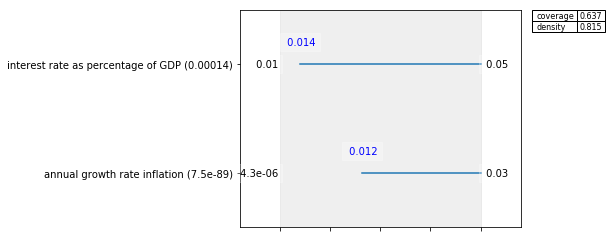

In [153]:
n_box = 6
box4.inspect(n_box)
box4.inspect(n_box, style='graph')
plt.show()

In [109]:
y_inc= np.mean(outcomes1['real disposable income'],axis=1)
pdy5=pd.DataFrame(y_inc).describe([0.25])
pdy5

,0
count,10000.000000
mean,451.749133
std,155.673715
min,178.770097
25%,332.708280
50%,429.068714
max,1059.904069


In [110]:
#real disposable income,low 25%
y5_outcome=y_inc <429.068714

[MainProcess/INFO] 10000 points remaining, containing 5000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1086, coverage: 0.2172, density: 1.0 restricted_dimensions: 3


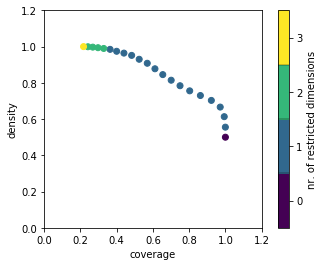

In [111]:
prim_alg = prim.Prim(experiments2, y5_outcome, threshold=0.9, peel_alpha=0.1)
box5= prim_alg.find_box()
box5.show_tradeoff()
plt.show()

coverage      0.7008
density     0.814505
id                 8
mass          0.4302
mean        0.814505
res_dim            1
Name: 8, dtype: object

                                 box 8                       
                                   min       max    qp values
annual growth rate inflation  0.017094  0.029995  [0.0, -1.0]



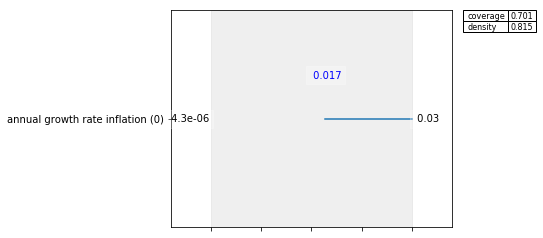

In [112]:
n_box = 8
box5.inspect(n_box)
box5.inspect(n_box, style='graph')
plt.show()

In [113]:
y_budg= np.mean(outcomes1['Public Budget Balance including interest payments'],axis=1)
pdy6=pd.DataFrame(y_budg).describe([0.25])
pdy6

,0
count,10000.000000
mean,-1.770847
std,7.823992
min,-29.118525
25%,-7.271052
50%,-2.700207
max,34.401102


In [114]:
#Public Budget Balance including interest payments,low 25%
y6_outcome=y_budg <0

[MainProcess/INFO] 10000 points remaining, containing 6414 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1494, coverage: 0.23292797006548177, density: 1.0 restricted_dimensions: 3


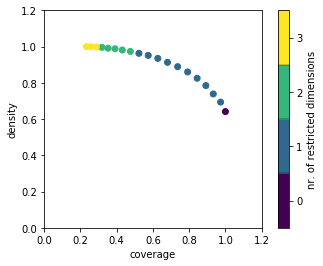

In [115]:
prim_alg = prim.Prim(experiments2, y6_outcome, threshold=0.9, peel_alpha=0.1)
box6= prim_alg.find_box()
box6.show_tradeoff()
plt.show()

coverage    0.736514
density     0.889307
id                 6
mass          0.5312
mean        0.889307
res_dim            1
Name: 6, dtype: object

                                 box 6                       
                                   min       max    qp values
annual growth rate inflation  0.014064  0.029995  [0.0, -1.0]



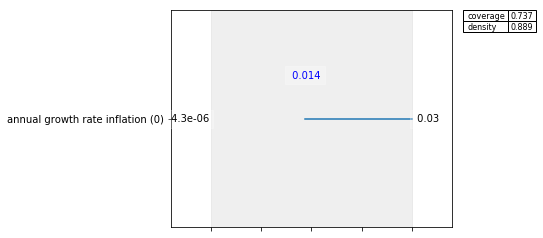

In [163]:
n_box =6
box6.inspect(n_box)
box6.inspect(n_box, style='graph')
plt.show()

In [117]:
y_prof= np.mean(outcomes1['profit'],axis=1)
pdy7=pd.DataFrame(y_prof).describe([0.25])
pdy7

,0
count,10000.000000
mean,21.691608
std,10.320261
min,4.772636
25%,13.510609
50%,20.173648
max,87.954469


In [145]:
#profit, low 25%
y7_outcome=y_prof <20

[MainProcess/INFO] 10000 points remaining, containing 4943 cases of interest
[MainProcess/INFO] mean: 0.9007633587786259, mass: 0.0524, coverage: 0.0954885696945175, density: 0.9007633587786259 restricted_dimensions: 6


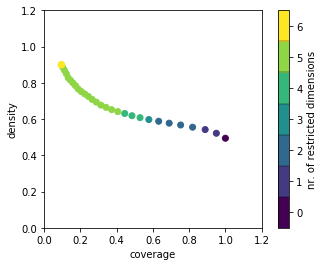

In [146]:
prim_alg = prim.Prim(experiments2, y7_outcome, threshold=0.9, peel_alpha=0.1)
box7= prim_alg.find_box()
box7.show_tradeoff()
plt.show()

coverage    0.631803
density     0.587914
id                 6
mass          0.5312
mean        0.587914
res_dim            2
Name: 6, dtype: object

                                 box 6            \
                                   min       max   
propensity to save            0.067357  0.099998   
annual growth rate inflation  0.005701  0.029995   

                                                              
                                                   qp values  
propensity to save             [9.725195688986525e-12, -1.0]  
annual growth rate inflation  [5.1781262624270535e-09, -1.0]  



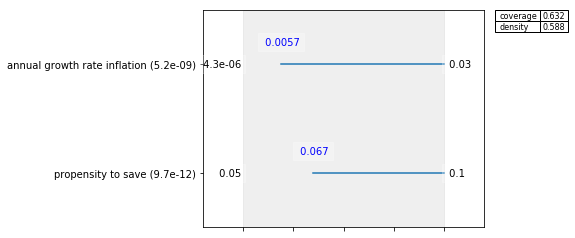

In [147]:
n_box = 6
box7.inspect(n_box)
box7.inspect(n_box, style='graph')
plt.show()